Employee Turnover or Employee Turnover ratio is the measurement of the total number of employees who leave an organization in a particular year. Employee Turnover Prediction means to predict whether an employee is going to leave the organization in the coming period.

#  ----------------------------Machine learning model Pipeline---------------------------

# A.IMPORTING LIABRARIES

# B.EXPLORATORY DATA ANALYSIS
## Steps:
#### 1.Analysing the data
#### 2.See the outliers and check distribution of the data
#### 3.Analyse categorical data

# C.FEATURE ENGINEERING
## Steps:
#### 1.Missing values treatment
#### 2.Outlier treatment
#### 3.Handling categorical and continuous values
#### 4.Scaling/Normalization
#### 5.Dimension Reduction(Feature selection or Feature extraction)
#### 6.Splitting the dataset

# D.BUILD MODEL AND TRAIN WITH VARIOUS MODEL

# E. ALGORITHM SELECTION AND HYPERPARAMETER TUNING 

# Import liabraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

#different classfication algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

#performance measure
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

sklearn.show_versions()


System:
    python: 3.9.6 (tags/v3.9.6:db3ff76, Jun 28 2021, 15:26:21) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\sahoo\AppData\Local\Programs\Python\Python39\python.exe
   machine: Windows-10-10.0.22000-SP0

Python dependencies:
          pip: 21.2.2
   setuptools: 56.0.0
      sklearn: 0.24.2
        numpy: 1.19.5
        scipy: 1.7.1
       Cython: None
       pandas: 1.3.1
   matplotlib: 3.4.2
       joblib: 1.0.1
threadpoolctl: 2.2.0

Built with OpenMP: True


In [3]:
d=pd.read_csv("C:/Users/sahoo/Desktop/ExposysLab Internship/diabetes.csv")
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

In [4]:
d['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

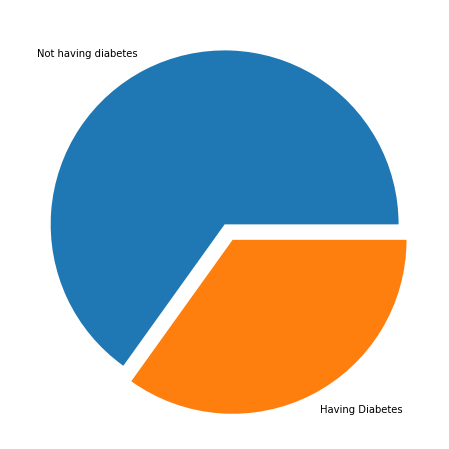

In [5]:
labels=['Not having diabetes','Having Diabetes']
values=list(d['Outcome'].value_counts())
explode = (0, 0.1)
plt.figure(figsize=(8,8))
plt.pie(values,labels=labels,explode=explode)
plt.show()

<Figure size 720x720 with 0 Axes>

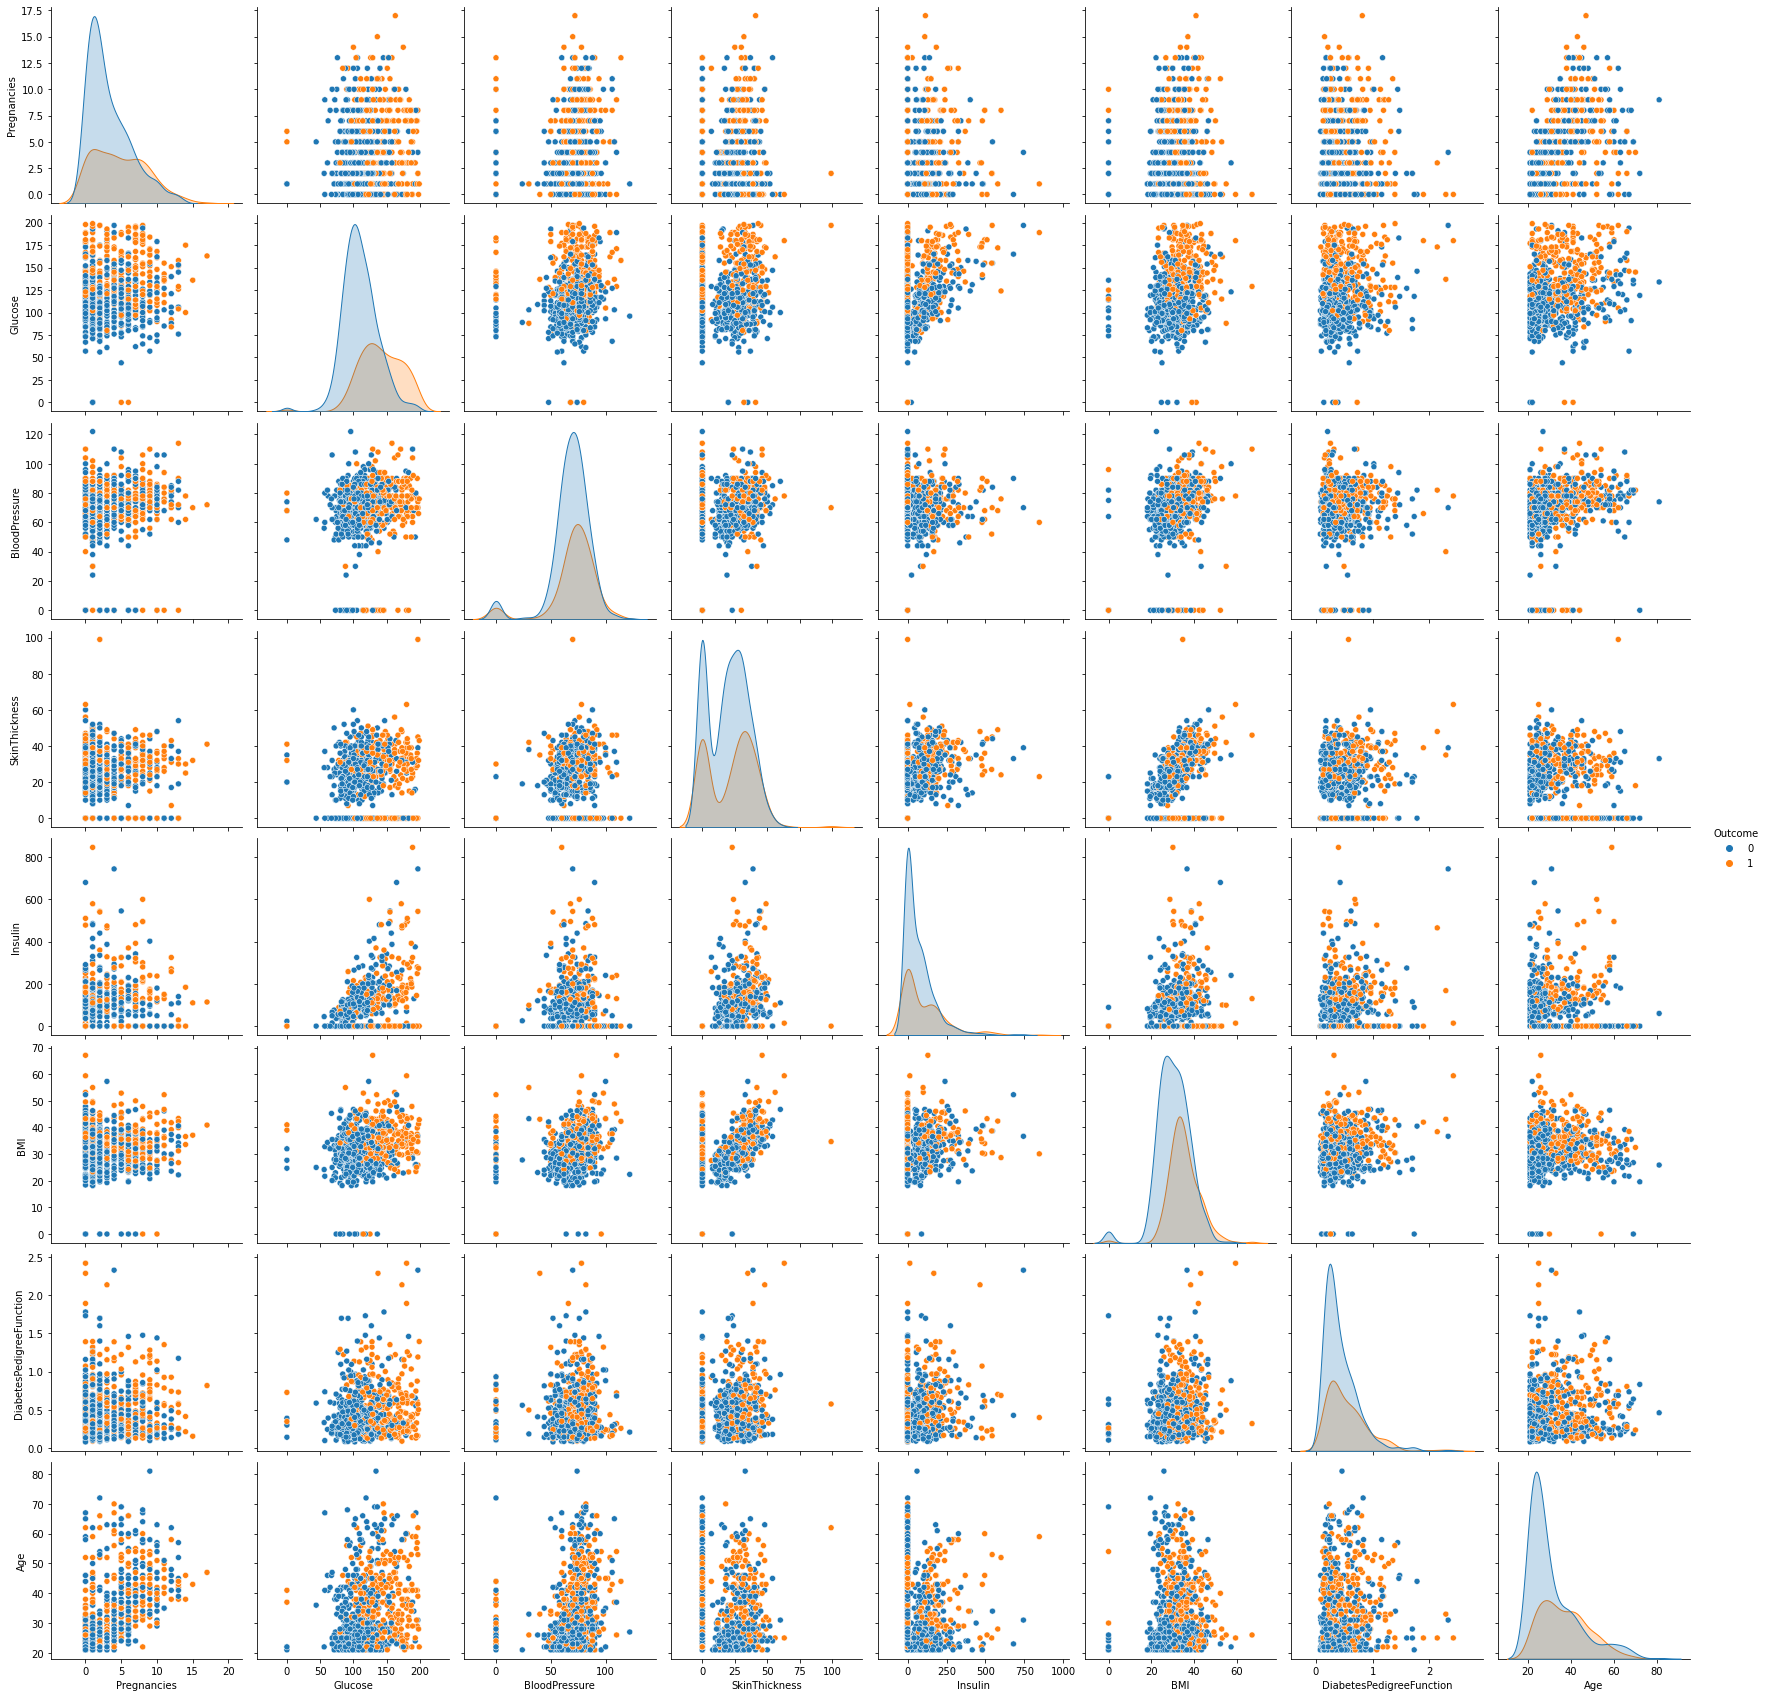

In [6]:
plt.figure(figsize=(10,10))
sns.pairplot(d,hue='Outcome',height=3)
plt.show()

In [7]:
d.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#d['Pregnancies'].value_counts()

In [9]:
#num_col=[i for i in d.columns if d[i].dtypes!='O'] #contains all the numeric cols which has datatype not equal to object

cat_col=['Outcome']

num_col=list(set(d.columns)-set(cat_col)) #set operation

num_col,cat_col

(['DiabetesPedigreeFunction',
  'Pregnancies',
  'Insulin',
  'BloodPressure',
  'Glucose',
  'SkinThickness',
  'BMI',
  'Age'],
 ['Outcome'])

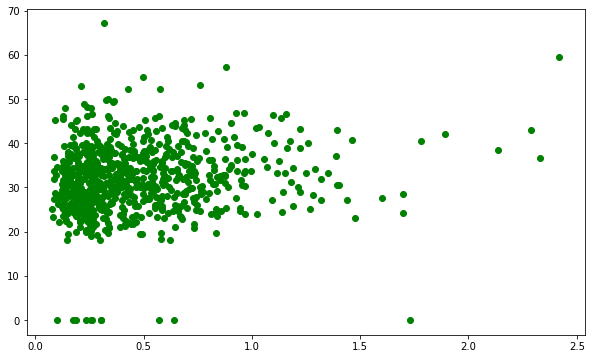

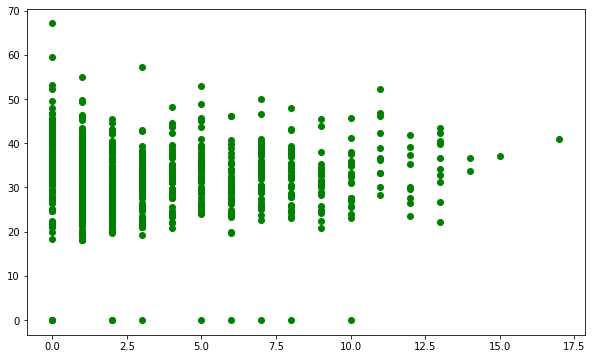

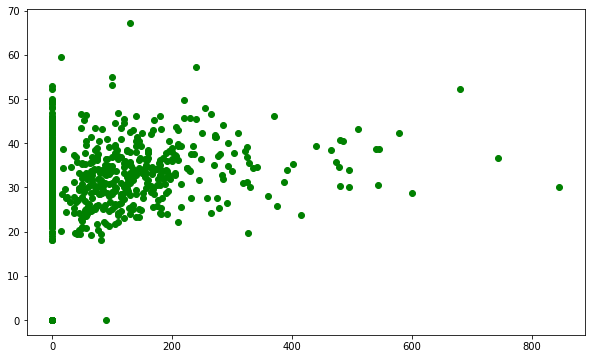

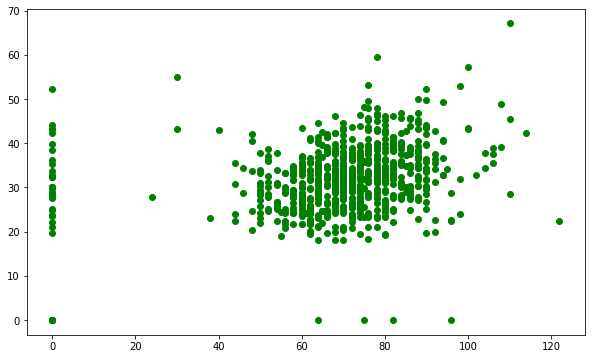

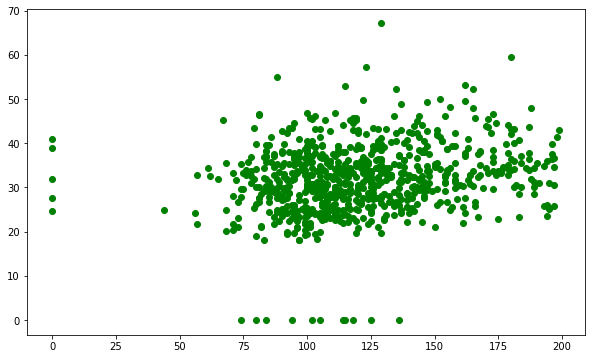

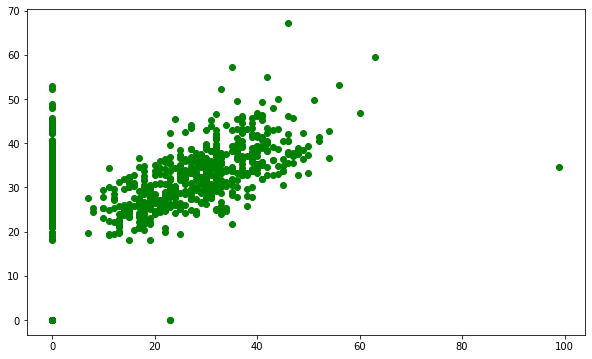

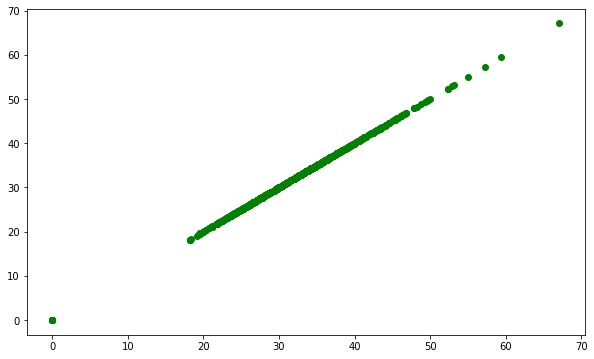

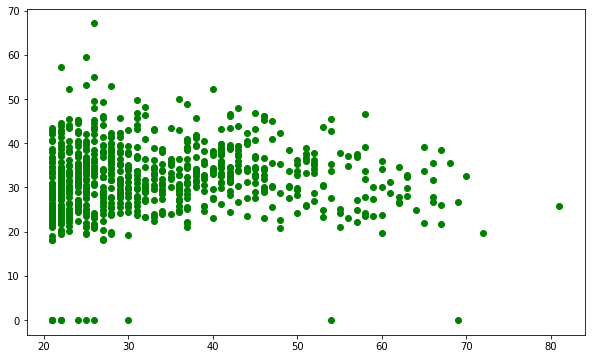

In [10]:
for i in num_col:
    plt.figure(figsize=(10,6))
    plt.scatter(d[i],d['BMI'],c=['green'])
    plt.show()

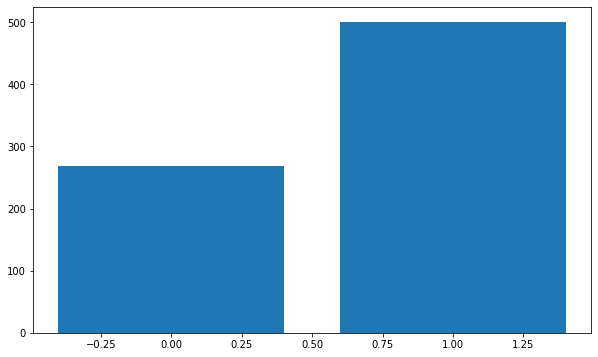

In [11]:
for i in cat_col:
    plt.figure(figsize=(10,6))
    plt.bar(list(d[i].unique()),list(d[i].value_counts()))
    plt.show()

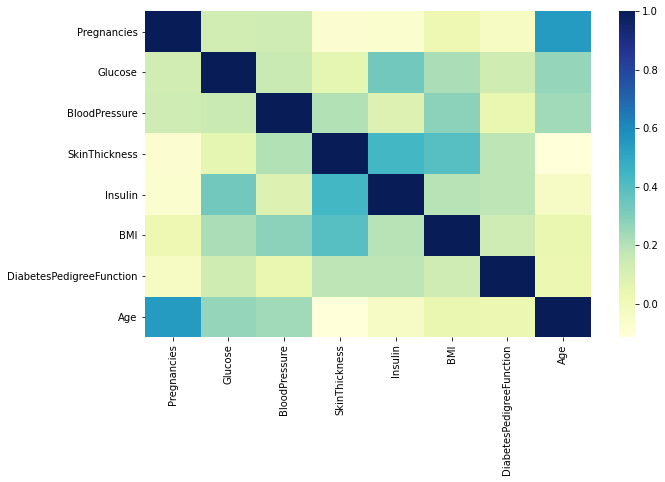

In [12]:
plt.figure(figsize=(10,6))
features=d.drop('Outcome',axis=1).corr()
sns.heatmap(features
           ,cmap='YlGnBu')
plt.show()

# Observation


>There are less no. of employee who don't left that particular company.

> There are more no of employees who are under sales dept. followed by accounting and hr.

> And usually the person who have high satisfaction level then don't leave the job (we all know that if a peroson happy with his work who do he left the company).

>The people who have more avg monthly hour and got promotion in last 5 years they are most likely to not left the company.



# Feature engineering


In [13]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
d.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


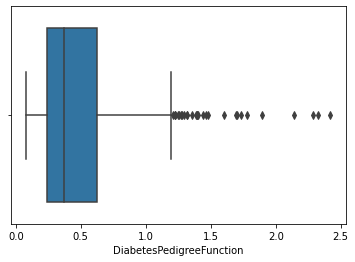

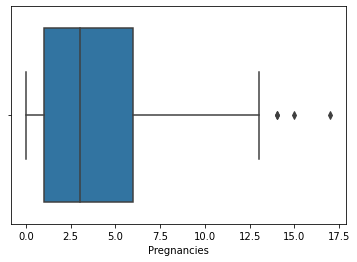

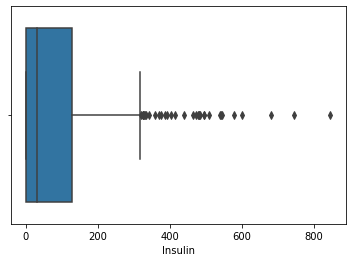

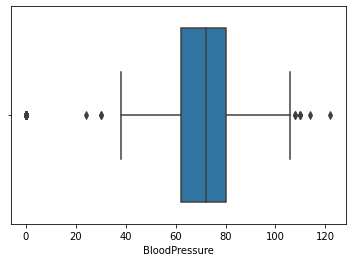

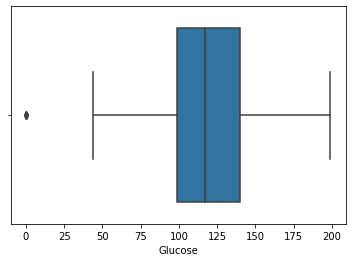

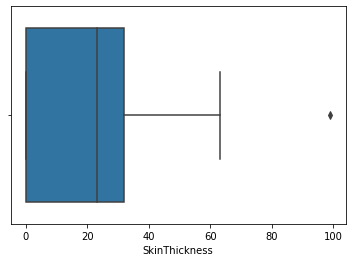

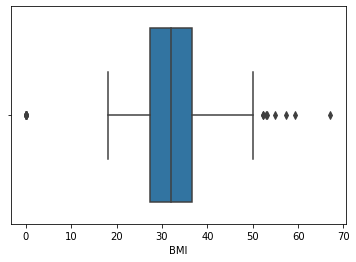

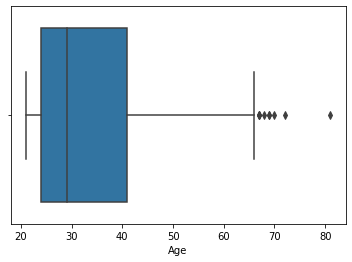

In [15]:
for i in num_col:
    sns.boxplot(x=d[i])
    plt.show()

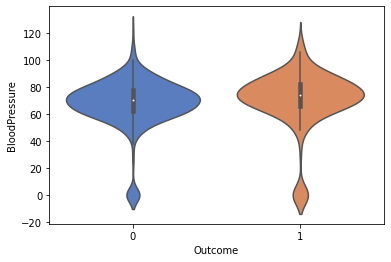

In [16]:
ax = sns.violinplot(x='Outcome', y='BloodPressure', data=d, palette='muted', split=True)

## Observation

> The very first thing to note is there are lot of outliers presents some of the features we need to cap them to certain limit otherwise it will be responsibe to decrease the performance of the model or may ge toverfit.

>We get the above graph. If we observe minutely, we can see that the box plot for 1 (Diabetic) inside the violin is a little more away from the horizontal axis than the box plot for 0 (Non Diabetic). It can be implied that diabetics seem to have a higher blood pressure than the non-diabetics. The bottom tail of the violins indicates the zero values we need to replace. We will replace the zeros for 1 with median of 1 and same for 0.



In [17]:
#Replacing the zero-values for Blood Pressure
df1 = d.loc[d['Outcome'] == 1]
df2 = d.loc[d['Outcome'] == 0]
df1 = df1.replace({'BloodPressure':0}, np.median(df1['BloodPressure']))
df2 = df2.replace({'BloodPressure':0}, np.median(df2['BloodPressure']))
dataframe = [df1, df2]
dataset = pd.concat(dataframe)

> There won’t be any zero-values in BloodPressure column post this. Let’s move to the next variable

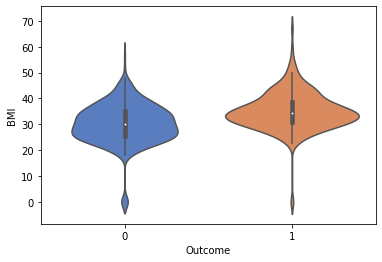

In [18]:
ax = sns.violinplot(x='Outcome', y='BMI', data=d, palette='muted', split=True)

>The variable seems to be closely following the normal distribution as the mean and median are approximately equal. However, it faces the same problem as before, that is, the existence of zero-values. As the above violin plot represent for BMI.


>We can observe that the 1 follows normal distribution, while 0 doesn’t. Also, BMI for diabetics is more than BMI for non-diabetics (can be observed using box plot). We do the same treatment for zero-values in BMI that we followed for zero-values for Blood Pressure. In this case, we can also replace by mean, however, I will stick with median. We run the same code after changing the column name. Moving on to the next variable

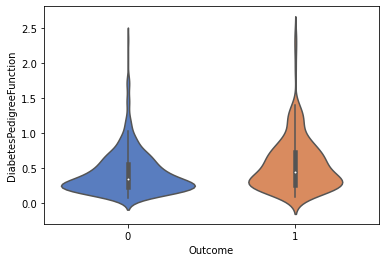

In [19]:
ax = sns.violinplot(x='Outcome', y='DiabetesPedigreeFunction', data=d, palette='muted', split=True)

> Diabetes Pedigree Function is a positively skewed variable with no zero values. We use the same violin plot to observe the characteristics.

> Same hypothesis can be formed. Diabetics seem to have a higher pedigree function that the non-diabetics. Moving on to the 5th independent variable.

> Analyzing Glucose, we observe the variable not following the normal distribution. We encounter zero-values in this instance as well. There are 5 such values for which treatment is required. We perform the same treatment as before, replacing by median (class-wise)

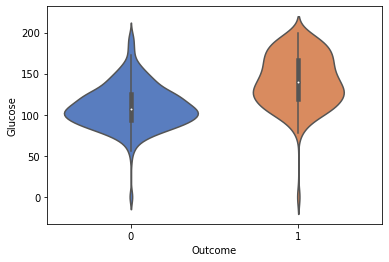

In [20]:
ax = sns.violinplot(x='Outcome', y='Glucose', data=d, palette='muted', split=True)

> Observing the violin plot, we see a massive vertical distance between the box-plot for Diabetics and Non-Diabetics. This indicates that Glucose can be a very important variable in model-building. After treating the zero values, we move to the next variable.

> As mentioned in the data dictionary available with the dataset if plot use descriptive and quantile statistics, Insulin is the 2-Hour serum insulin (mu U/ml). The variable is positively skewed. However, the occurrence of zero-values is high in this case, making up 48.7% of the data. This data has to be imputed. We first treat these

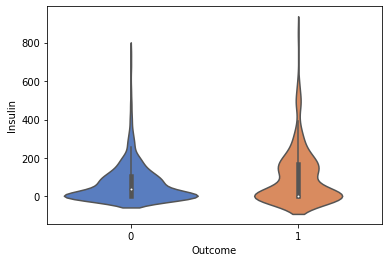

In [21]:
ax = sns.violinplot(x='Outcome', y='Insulin', data=d, palette='muted', split=True)

> After treating the zero-values, we derive at this graph. We can still see 0 as the median for Insulin for Diabetics. However, for Non-Diabetics, Insulin is a little higher. It can be roughly hypothesized that Insulin for Diabetics is lower than Non-Diabetics. Moving forward to Pregnancies.

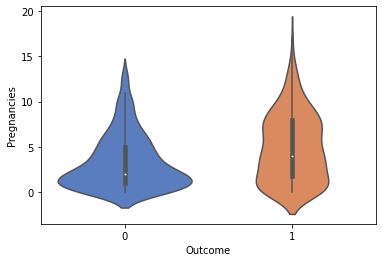

In [22]:
ax = sns.violinplot(x='Outcome', y='Pregnancies', data=d, palette='muted', split=True)

> The variable is positively skewed with 14.5% zero values. We need not treat zero values as its not an abnormal occurrence. However, given the fact that 85.5% of the values is non-zero, we can infer that this study is done for females only. Looking at the behavior using violin plots we observe diabetic women had more pregnancies than non-diabetic.

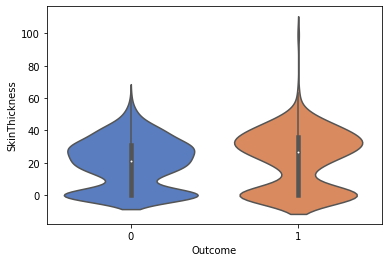

In [23]:
ax = sns.violinplot(x='Outcome', y='SkinThickness', data=d, palette='muted', split=True)

> Moving on to our last independent variable, we observe the same patterns as most of the previous variable. The data is positively skewed with 29.6% of zero values. After treating, we use the violin plot to observe a crude relationship.

>Skin Thickness for Diabetics is more than that of Non-Diabetics.
Our Dependent Variable ‘Outcome’ takes Boolean values 0 and 1. 0 indicates non-diabetic and 1 indicates diabetic. To examine the occurrence, we use a simple bar plot

* Outliers are extreme values existing in the dataset. It is necessary to treat outliers if a distance-based algorithm (logistic regression, SVM, etc) is applied on the dataset. Outliers do not affect a tree-based algorithm. Since we will use both distance and tree-based algorithms, we will scale our data to treat outliers. We use Standard Scaler for the process. Standard Scaler transforms the feature by subtracting the mean and dividing with the standard deviation. This way the feature also gets close to standard normal distribution with mean 0.

In [24]:
#Splitting the data into dependent and independent variables
Y = d.Outcome
x = d.drop('Outcome', axis = 1)
columns = x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [39]:
#Splitting the data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

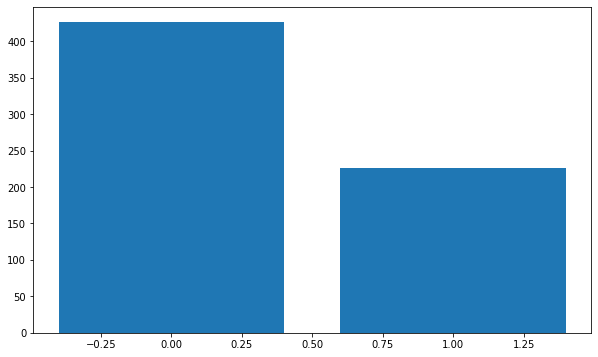

In [40]:
plt.figure(figsize=(10,6))
plt.bar(list(y_train.unique()),list(y_train.value_counts()))
plt.show()

# Observation:

> A huge imbalance can be observed in the y_train values. To overcome this problem, we use the SMOTE technique.

> Synthetic Minority Oversampling Technique (SMOTE) is used to remove the imbalance in the training data by creating samples using the current data. It does not create duplicates. Remember it is always done on the Training Date and not on the original data as the Test Data should only contain real-life values and not the synthetic sample.

In [41]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
np.bincount(y_train)

array([426, 426], dtype=int64)

# D.Model Training

In [48]:
classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(x_train, y_train)
y_pred = classifier_rbf.predict(x_test)
print('Accuracy of SVC (RBF) classifier on test set: {:.2f}'.format(classifier_rbf.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of SVC (RBF) classifier on test set: 0.71
0.6959605303731113
0.6947115384615384
0.7084942084942085


In [42]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('SVC',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('ET',ExtraTreesClassifier()))
models.append(('AdaB',AdaBoostClassifier()))
models.append(('GB',GradientBoostingClassifier()))

pred=[]
print("Start Training..\n")
for i,j in models:
    clf=j.fit(x_train,y_train)
    print("Model performance using {0}\n".format(i))
    pred_1=accuracy_score(y_test,clf.predict(x_test))
    print("_____Accuracy: ",pred_1)
    pred.append(pred_1)
    print("_____Confusion Matrix:\n ",confusion_matrix(y_test,clf.predict(x_test)))
    print("...")
    print("\n\n")
print("Done")

Start Training..

Model performance using LR

_____Accuracy:  0.7155172413793104
_____Confusion Matrix:
  [[55 19]
 [14 28]]
...



Model performance using SVC

_____Accuracy:  0.7068965517241379
_____Confusion Matrix:
  [[52 22]
 [12 30]]
...



Model performance using KNN

_____Accuracy:  0.7155172413793104
_____Confusion Matrix:
  [[54 20]
 [13 29]]
...



Model performance using DT

_____Accuracy:  0.6206896551724138
_____Confusion Matrix:
  [[54 20]
 [24 18]]
...



Model performance using RF

_____Accuracy:  0.7327586206896551
_____Confusion Matrix:
  [[58 16]
 [15 27]]
...



Model performance using ET

_____Accuracy:  0.7586206896551724
_____Confusion Matrix:
  [[61 13]
 [15 27]]
...



Model performance using AdaB

_____Accuracy:  0.7327586206896551
_____Confusion Matrix:
  [[55 19]
 [12 30]]
...



Model performance using GB

_____Accuracy:  0.7413793103448276
_____Confusion Matrix:
  [[56 18]
 [12 30]]
...



Done


## Observation

1) It can be observed that out of all 8 algorithms 3 are giving almost same accuracy/

2) Random Forest is having highest accuracy among all so Random Forest is going to be the benchmark model for this problem and we will tune hyperparater on SVC to increase the performance

# E. HYPERPARAMETER TUNING AND MODEL SELECTION

In [49]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

rf_random.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [54]:
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
print(f1_score(y_test, y_pred, average="macro"))
print(precision_score(y_test, y_pred, average="macro"))
print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.75
0.7307723089235694
0.7296909843899331
0.7319819819819819


In [56]:
final_clf=RandomForestClassifier(n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=50, bootstrap=True).fit(x_train,y_train)

accuracy_score(final_clf.predict(x_test),y_test)

0.7413793103448276

In [ ]:
confusion_matrix(y_test,model.predict(x_test))

In [71]:
model = RandomForestClassifier(n_estimators=300, bootstrap = True, max_features = 'sqrt')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('Accuracy of Random Forest on test set: {:.2f}'.format(model.score(x_test, y_test)))
#print(f1_score(y_test, y_pred, average="macro"))
#print(precision_score(y_test, y_pred, average="macro"))
#print(recall_score(y_test, y_pred, average="macro"))

Accuracy of Random Forest on test set: 0.74


In [72]:
final_clf

RandomForestClassifier(bootstrap=False, max_depth=50, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=2000)

In [2]:
print("Accuracy of Random Forest: ",0.74)
print("F1-Score: ",0.73)
print("Precision Score: ",0.72)
print("Recall Score: ",0.73)

Accuracy of Random Forest:  0.74
F1-Score:  0.73
Precision Score:  0.72
Recall Score:  0.73


# Deep learning implementation

In [1]:
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten

In [27]:
#Splitting of dataset into Training set and testing set (80% and 20% respectively)
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.2, random_state=42)

In [30]:
#Single layer architecture
model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_test, Y_test))
loss, accuracy = model.evaluate(X_test,Y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                288       
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_9 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
activation_10 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

Epoch 42/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5444 - accuracy: 0.6959 - val_loss: 0.5965 - val_accuracy: 0.6948
Epoch 43/200
5/5 [==============================] - 0s 10ms/step - loss: 0.5281 - accuracy: 0.7420 - val_loss: 0.5875 - val_accuracy: 0.7338
Epoch 44/200
5/5 [==============================] - 0s 12ms/step - loss: 0.5185 - accuracy: 0.7384 - val_loss: 0.6652 - val_accuracy: 0.6753
Epoch 45/200
5/5 [==============================] - 0s 10ms/step - loss: 0.5567 - accuracy: 0.7018 - val_loss: 0.6001 - val_accuracy: 0.6623
Epoch 46/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5122 - accuracy: 0.7581 - val_loss: 0.5991 - val_accuracy: 0.7273
Epoch 47/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5483 - accuracy: 0.7197 - val_loss: 0.6098 - val_accuracy: 0.7143
Epoch 48/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5173 - accuracy: 0.7445 - val_loss: 0.5932 - val_accuracy: 0.7078
Epoch 49/200
5/5 

5/5 [==============================] - 0s 8ms/step - loss: 0.4366 - accuracy: 0.7964 - val_loss: 0.6544 - val_accuracy: 0.6104
Epoch 159/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4744 - accuracy: 0.7830 - val_loss: 0.6669 - val_accuracy: 0.6948
Epoch 160/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4385 - accuracy: 0.7853 - val_loss: 0.6552 - val_accuracy: 0.6948
Epoch 161/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4768 - accuracy: 0.7750 - val_loss: 0.5939 - val_accuracy: 0.7013
Epoch 162/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4806 - accuracy: 0.7561 - val_loss: 0.5987 - val_accuracy: 0.7013
Epoch 163/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4466 - accuracy: 0.7835 - val_loss: 0.7972 - val_accuracy: 0.6623
Epoch 164/200
5/5 [==============================] - 0s 8ms/step - loss: 0.5360 - accuracy: 0.7565 - val_loss: 0.5950 - val_accuracy: 0.7273
Epoch 165/200
5/5 [========

In [35]:
d=pd.DataFrame()
d['Models']=['LR','SVC','KNN','DT','RF','ET','AdaBoost','GB','ANN']
d['Accuracy']=[71,70,71,62,73,71,72,72,70]


,Models,Accuracy
0,LR,71
1,SVC,70
2,KNN,71
3,DT,62
4,RF,73
5,ET,71
6,AdaBoost,72
7,GB,72
8,ANN,70
